<a href="https://colab.research.google.com/github/ThatNerdSquared/datasci/blob/main/Introduction_to_Student's_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Student's t-test
Authors: Eva Yap, Neha Sharma, and Saba Akhyani.

Let's start with a bit of history. 

The t-test was first published by William Sealy Gosset in 1908 (that's pretty long ago). Gosset was an employee at the Guinness Brewery in Dublin, Ireland and was interested in problems such as measuring the difference between barley yields. 

He developed the t-test and published his work under the "Student" pseudonym. Gosset did this at that time because Guinness was not keen on their employees using their real name in academic publications and did not want to give away their secrets to competitors. Sneaky!


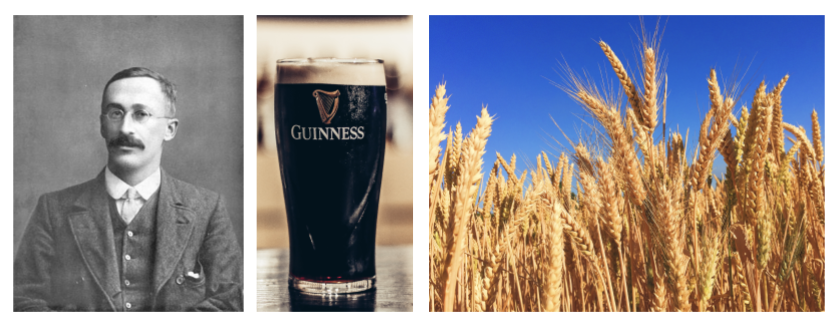

Left photo: British statistician William Sealy Gosset, known as "Student", taken in 1908. User Wujaszek on pl.wikipedia, Public domain, via Wikimedia Commons.

Center photo: Photo by [Christopher Zapf](https://unsplash.com/@bildschirmaffe) on [Unsplash](https://unsplash.com/). 

Right photo: Photo by [Melissa Askew](https://unsplash.com/@melissaaskew) on [Unsplash](https://unsplash.com/). 

## When to use it
The Student's t-test can be used to determine whether the means of two groups are *statistically different*. 

Let's use an example to illustrate this. Based on the image below, let's say we want to know if there's a difference in sunflower height between the left and right areas relative to the path.



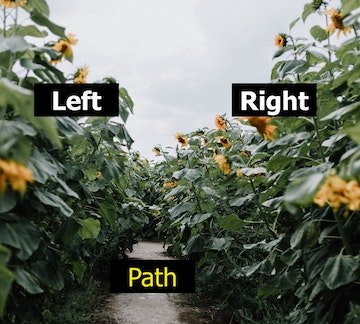

Photo by [Priscilla Du Preez](https://unsplash.com/@priscilladupreez) on [Unsplash](https://unsplash.com/).



We then pick 50 sunflowers from each area and measure their heights and we visualize our data using the graph below. Which area has taller sunflowers? 

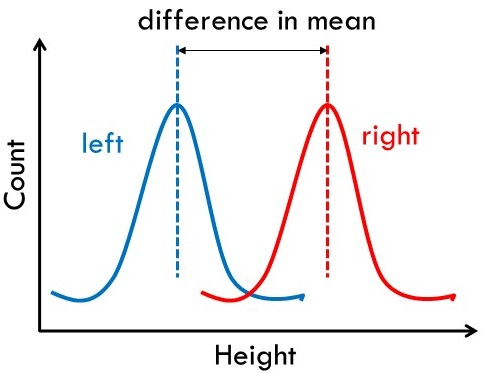

Now, let's consider the graphs below. What do we see?

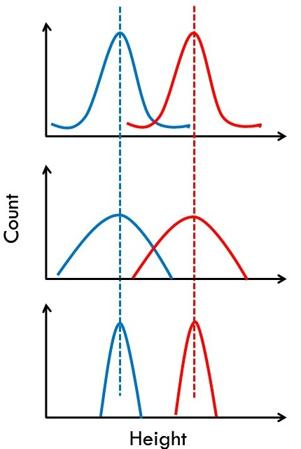

This means that when we measure mean difference between two groups, we need to take into account the variance within each group. And this is what the t-value of the Student's t-test represents (see formula for t-value below). You can think of the t-value as a signal-to-noise ratio.

\

$t = \frac{\text{Signal}}{\text{Noise}} = \frac{\text{Difference between group means}}{\text{Variance within groups}} = \frac{\bar x_1 - \bar x_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

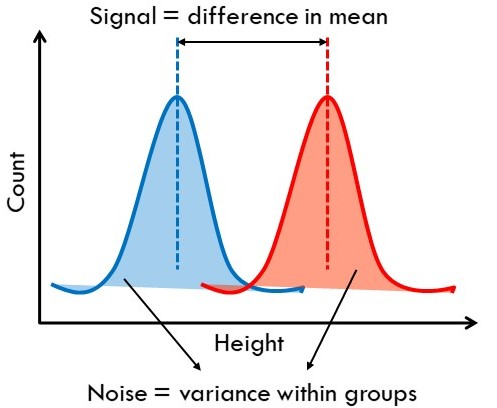

Note that this is just the t-value. We'll get to the **t-test** later on but let's switch gears back to our global plastic waste data set.

## Global plastic waste data set

Recall the global plastic waste data set that we've been working with in previous workshops. In this notebook, we'll use a Student's t-test to determine whether per capita plastic waste is different between Asia and South America.



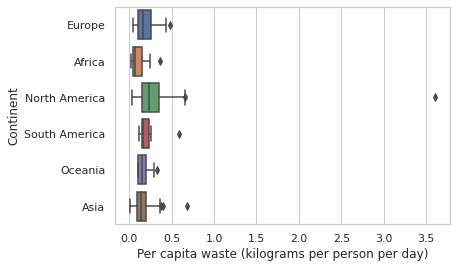

In Python, ```scipy.stats``` is used to perform statistical operations (e.g., t-test). This will save us some time as we don't have to calculate the t-value by hand. For more details about the ```scipy.stats``` library, you can refer [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). 

Let's start by loading the libraries we need.

In [ ]:
# Import pandas to create a data frame
import pandas as pd
import numpy as np

# Import the libraries we'll use to create graphs
from matplotlib import pyplot as plt
# This command makes sure the graphs show in this window, not a new one
%matplotlib inline 

# import seaborn for creating graphs
import seaborn as sns

# import scipy for t-test
import scipy.stats as stats

## Load data set
Now we'll load the data set and plot a box plot showing per capita waste of Asia and South America.

In [ ]:
# load data
waste_vs_gdp_cc_df = pd.read_csv("plastic_waste_continents.csv", sep=",")

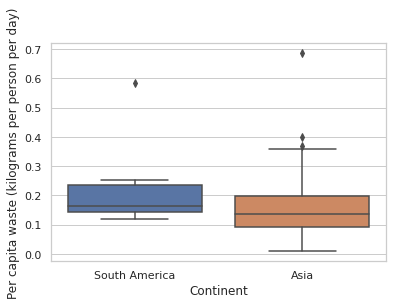

In [ ]:
# plot box plot with only data from Asia and South America
sns.set_theme(style="whitegrid")
p = sns.boxplot(x='Continent',
                y='Per capita waste (kilograms per person per day)',
                data=waste_vs_gdp_cc_df[waste_vs_gdp_cc_df['Continent'].isin(['Asia', 'South America'])])

What do you think? Is there a statistical difference between the per capita waste of Asia and South America?

## Calculate t-value

As mentioned above, we'll use the ```scipy.stats``` package for this so we won't be calculating this manually.

In [ ]:
# ttest Asia and South America
stats.ttest_ind(waste_vs_gdp_cc_df['Continent'] == 'Asia',
                waste_vs_gdp_cc_df['Continent'] == 'South America')

Ttest_indResult(statistic=3.7462828939558896, pvalue=0.00021678348907300604)

Ignore the p-value for now; we'll get to that. What is the t-value calculated here telling us?

## Hypothesis testing

In the section above, we calculated the t-value. But what are we testing for?

Recall that we want to test the difference in per capita plastic waste between Asia and South America. To this end, we can state our null and alternate hypotheses. 

\

$ H_o = \text{There is no statiscally significant difference between the per capita plastic waste of Asia and South America.}$
\
$ H_a = \text{There is a statiscally significant difference between the per capita plastic waste of Asia and South America.}$

\

Hence, we're testing if our null hypothesis is true or not.



## Student's t-distribution

To do this, we compare our t-value to a critical value. If our t-value is lower than the critical value, we accept the null hypothesis. However, if our t-value is higher than the critical value, we reject the null hypothesis in favour of the alternative hypothesis.

We find this critical value by referring to the [t-distribution table](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm). Before doing so, we need to determine the significance level (i.e. odds that the result is due to chance) and degrees of freedom (i.e. number of values you can vary) for the test. 

For this exercise, we'll use the following. 

* Significance level, α = 0.05
* Two-tailed test = α/2 = 0.025
* Degrees of freedom = 40

In [ ]:
# number of values for Asia
waste_vs_gdp_cc_df[waste_vs_gdp_cc_df['Continent'] == 'Asia'].shape

(32, 10)

In [ ]:
# number of values for South America
waste_vs_gdp_cc_df[waste_vs_gdp_cc_df['Continent'] == 'South America'].shape

(10, 10)

$ df = n_1 + n_2 - 2 = 32 + 10 - 2 = 40$

Ok, we're ready to look up the critical value on the t-distribution table. What did we find?

## Interpreting the result

* At α = 0.025 and df = 40, our t-value, 3.746 is larger than the critical value, 2.021.
* We can reject the null hypothesis in favour of the alternative hypothesis, meaning that there is a statistically significant difference between the per capita plastic waste of Asia and South America.

In [ ]:
# let's run the ttest again
stats.ttest_ind(waste_vs_gdp_cc_df['Continent'] == 'Asia',
                waste_vs_gdp_cc_df['Continent'] == 'South America')

Ttest_indResult(statistic=3.7462828939558896, pvalue=0.00021678348907300604)

Note that aside from the t-value, there is also a p-value output, which in this case equals 0.000217. 

The p-value here describes the probability of seeing this t-value by chance. Since the p-value is less than 0.05, we can reject the null hypothesis and say that the difference in per capita waste between Asia and South America is significantly different.

## Practice Question
Determine whether there's a significant difference between per capita waste of Africa and Oceania.

In [ ]:
# ttest Africa and Oceania
stats.ttest_ind(waste_vs_gdp_cc_df['Continent'] == 'Africa',
                waste_vs_gdp_cc_df['Continent'] == 'Oceania')
# alpha/2 = 0.20/2 = 0.10 (1-alpha) = 0.999
# calculate degree of freedom = 36-1+13-1 = 47
# check in t-distribution table critical = 3.273 < t-value = 3.675 => reject null hypotheis

Ttest_indResult(statistic=3.6751031249100214, pvalue=0.0002834914696278971)

In [ ]:
waste_vs_gdp_cc_df[waste_vs_gdp_cc_df['Continent'] == 'Africa'].shape

(36, 10)

In [ ]:
waste_vs_gdp_cc_df[waste_vs_gdp_cc_df['Continent'] == 'Oceania'].shape

(13, 10)

## Assumptions
As with all statistical tests, there are certain conditions that need to be met in order for the Student's t-test results to be considered reliable.

* The two groups are independent.
* Population distributions are normal.
* Samples have equal variances.

## References

* [An introduction to t-tests](https://www.scribbr.com/statistics/t-test/) by Rebecca Bevan.
* [Critical Values of the Student's t Distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm) by NIST.
* [Student's t-test](https://youtu.be/pTmLQvMM-1M) by Bozeman Science.
